In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import KernelDensity

In [2]:
train_df = pd.read_csv('generated_features_train.csv')
valid_df = pd.read_csv('generated_features_valid.csv')
test_df = pd.read_csv('generated_features_test.csv')

In [3]:
X_train = train_df.drop(columns=['Image', 'Class'])
y_train = train_df['Class']
X_valid = valid_df.drop(columns=['Image', 'Class'])
y_valid = valid_df['Class']
X_test = test_df.drop(columns=['Image', 'Class'])

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [5]:
dim_reduction_methods = {
    "PCA": PCA(n_components=10),  # Adjust components as necessary
    "Isomap": Isomap(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10, kernel='rbf'),
    "LLE": LocallyLinearEmbedding(n_components=10)
}

In [6]:
def evaluate_classifiers(X_train_reduced, X_valid_reduced, y_train, y_valid):
    classifiers = {
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
    }

    for name, clf in classifiers.items():
        clf.fit(X_train_reduced, y_train)
        y_pred = clf.predict(X_valid_reduced)
        print(f"\n{name} Results:")
        print(confusion_matrix(y_valid, y_pred))
        print(classification_report(y_valid, y_pred))

## Dimensionality Reduction and Evaluation

In [7]:
for name, method in dim_reduction_methods.items():
    print(f"\nApplying {name}...")
    X_train_reduced = method.fit_transform(X_train_scaled)
    X_valid_reduced = method.transform(X_valid_scaled)
    
    evaluate_classifiers(X_train_reduced, X_valid_reduced, y_train, y_valid)


Applying PCA...

SVM Results:
[[2 1 0 0 0 1 0 0 0 0]
 [2 6 0 0 0 0 1 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 1 0]
 [0 1 0 0 1 1 0 2 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 1 0 0 0 1 2 1 0 0]
 [0 0 0 0 0 1 0 5 0 0]
 [0 2 1 0 0 0 0 0 3 0]
 [0 0 2 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

      Ajwain       0.50      0.50      0.50         4
      Almond       0.55      0.67      0.60         9
      Ashoka       0.57      1.00      0.73         4
  Drum_Stick       1.00      0.67      0.80         3
    Fittonia       1.00      0.20      0.33         5
    Hibiscus       0.29      1.00      0.44         2
  Jack Fruit       0.67      0.40      0.50         5
       Mango       0.62      0.83      0.71         6
        Neem       0.75      0.50      0.60         6
     unknown       0.00      0.00      0.00         3

    accuracy                           0.57        47
   macro avg       0.59      0.58      0.52        47
weighted avg       0.62      0.57 

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results:
[[2 0 0 0 0 0 0 0 0 2]
 [0 5 0 0 0 1 3 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 1 0]
 [0 1 1 0 1 0 0 2 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [1 0 0 0 1 0 2 1 0 0]
 [0 1 0 0 1 0 0 4 0 0]
 [0 0 0 2 0 0 0 0 4 0]
 [0 0 2 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

      Ajwain       0.67      0.50      0.57         4
      Almond       0.71      0.56      0.62         9
      Ashoka       0.57      1.00      0.73         4
  Drum_Stick       0.50      0.67      0.57         3
    Fittonia       0.25      0.20      0.22         5
    Hibiscus       0.50      0.50      0.50         2
  Jack Fruit       0.40      0.40      0.40         5
       Mango       0.57      0.67      0.62         6
        Neem       0.80      0.67      0.73         6
     unknown       0.33      0.33      0.33         3

    accuracy                           0.55        47
   macro avg       0.53      0.55      0.53        47
weighted avg       0.56      0.55      0.

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results:
[[1 0 0 0 0 2 0 0 0 1]
 [0 4 0 0 0 1 1 2 0 1]
 [0 0 3 0 0 0 0 0 0 1]
 [0 0 0 3 0 0 0 0 0 0]
 [0 1 0 0 1 1 1 1 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 2 3 0 0]
 [0 0 0 0 0 0 0 6 0 0]
 [0 2 1 2 0 0 0 0 1 0]
 [2 0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

      Ajwain       0.33      0.25      0.29         4
      Almond       0.57      0.44      0.50         9
      Ashoka       0.60      0.75      0.67         4
  Drum_Stick       0.60      1.00      0.75         3
    Fittonia       0.33      0.20      0.25         5
    Hibiscus       0.00      0.00      0.00         2
  Jack Fruit       0.50      0.40      0.44         5
       Mango       0.50      1.00      0.67         6
        Neem       1.00      0.17      0.29         6
     unknown       0.00      0.00      0.00         3

    accuracy                           0.45        47
   macro avg       0.44      0.42      0.38        47
weighted avg       0.51      0.45      0.

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results:
[[1 0 1 0 0 2 0 0 0 0]
 [0 5 0 0 0 1 2 1 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 1 0]
 [0 0 0 0 3 2 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 1 0 1 2 1 0]
 [0 1 0 0 2 0 0 2 0 1]
 [0 1 0 1 0 0 0 0 4 0]
 [2 0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

      Ajwain       0.33      0.25      0.29         4
      Almond       0.71      0.56      0.62         9
      Ashoka       0.67      1.00      0.80         4
  Drum_Stick       0.67      0.67      0.67         3
    Fittonia       0.50      0.60      0.55         5
    Hibiscus       0.29      1.00      0.44         2
  Jack Fruit       0.33      0.20      0.25         5
       Mango       0.40      0.33      0.36         6
        Neem       0.67      0.67      0.67         6
     unknown       0.00      0.00      0.00         3

    accuracy                           0.51        47
   macro avg       0.46      0.53      0.46        47
weighted avg       0.50      0.51      0.

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Random Forest Results:
[[1 1 1 0 0 0 1 0 0 0]
 [0 3 1 0 2 1 1 1 0 0]
 [0 0 2 0 0 0 0 0 0 2]
 [0 1 0 2 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 1 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 3 0 0 0]
 [1 1 0 0 1 1 0 2 0 0]
 [0 4 0 0 0 0 0 0 2 0]
 [0 0 3 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

      Ajwain       0.50      0.25      0.33         4
      Almond       0.25      0.33      0.29         9
      Ashoka       0.29      0.50      0.36         4
  Drum_Stick       1.00      0.67      0.80         3
    Fittonia       0.29      0.40      0.33         5
    Hibiscus       0.25      0.50      0.33         2
  Jack Fruit       0.60      0.60      0.60         5
       Mango       0.50      0.33      0.40         6
        Neem       1.00      0.33      0.50         6
     unknown       0.00      0.00      0.00         3

    accuracy                           0.38        47
   macro avg       0.47      0.39      0.39        47
weighted avg       0.47      0.38      0.

### Parzen Window (Linear Classifier)

In [19]:
def parzen_window_classifier(X_train, y_train, X_valid):
    classes = np.unique(y_train)
    densities = {}

    for c in classes:
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X_train[y_train == c])
        densities[c] = kde

    log_densities = np.array([densities[c].score_samples(X_valid) for c in classes]).T
    return classes[np.argmax(log_densities, axis=1)]

In [20]:
def evaluate_parzen(X_train, y_train, X_valid, y_valid):
    y_pred_parzen = parzen_window_classifier(X_train, y_train, X_valid)
    print("Parzen Window Classifier Results:")
    print(confusion_matrix(y_valid, y_pred_parzen))
    print(classification_report(y_valid, y_pred_parzen))

In [21]:
for name, method in dim_reduction_methods.items():
    print(f"\nApplying {name} for Parzen Window...")
    X_train_reduced = method.fit_transform(X_train_scaled)
    X_valid_reduced = method.transform(X_valid_scaled)
    
    evaluate_parzen(X_train_reduced, y_train, X_valid_reduced, y_valid)


Applying PCA for Parzen Window...
Parzen Window Classifier Results:
[[3 0 0 0 0 1 0 0 0 0]
 [0 6 0 0 1 0 1 0 0 1]
 [0 0 3 0 0 0 0 0 0 1]
 [0 0 0 2 0 0 0 0 1 0]
 [0 1 0 0 1 1 0 2 0 0]
 [2 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 2 0 1 0 0 0]
 [1 1 0 0 0 1 0 3 0 0]
 [0 0 0 2 0 0 0 0 4 0]
 [1 0 1 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

      Ajwain       0.33      0.75      0.46         4
      Almond       0.75      0.67      0.71         9
      Ashoka       0.75      0.75      0.75         4
  Drum_Stick       0.50      0.67      0.57         3
    Fittonia       0.25      0.20      0.22         5
    Hibiscus       0.00      0.00      0.00         2
  Jack Fruit       0.50      0.20      0.29         5
       Mango       0.60      0.50      0.55         6
        Neem       0.80      0.67      0.73         6
     unknown       0.33      0.33      0.33         3

    accuracy                           0.51        47
   macro avg       0.48      0.47      0.46       

e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\!VNIT College\A. Pattern Recognition\Leaf\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

# Clustering Method

In [29]:
def evaluate_clustering(X, method_name):
    if method_name == "K-Means":
        labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)
    elif method_name == "K-Medoids":
        labels = KMedoids(n_clusters=10).fit_predict(X)
    elif method_name == "DBSCAN":
        labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
    else:
        raise ValueError("Unknown clustering method")

    if len(set(labels)) > 1 and -1 not in labels:
        silhouette_avg = silhouette_score(X, labels)
        print(f"{method_name} Silhouette Score: {silhouette_avg}")
    else:
        print(f"{method_name} could not compute silhouette score.")

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f"{method_name} Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


Applying K-Means clustering after PCA...
K-Means Silhouette Score: 0.172024666270468


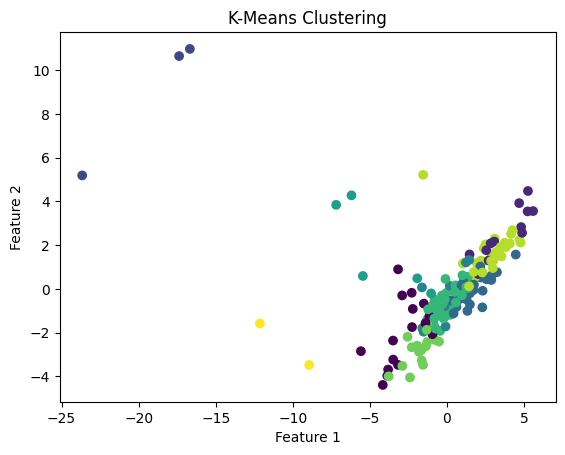


Applying K-Means clustering after Isomap...
K-Means Silhouette Score: 0.23988680367239507


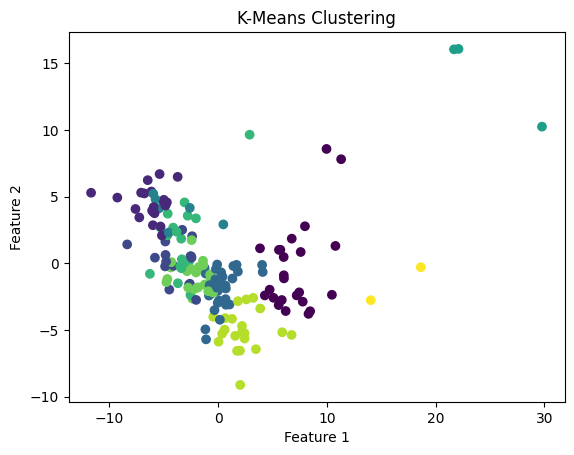


Applying K-Means clustering after KernelPCA...
K-Means Silhouette Score: 0.23599122471104633


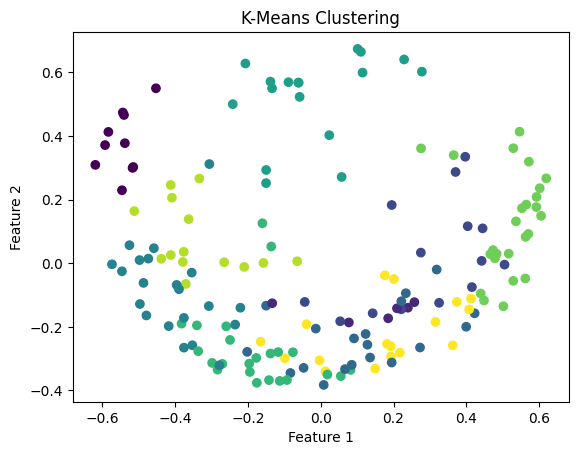


Applying K-Means clustering after LocallyLinearEmbedding...
K-Means Silhouette Score: 0.23348547569170566


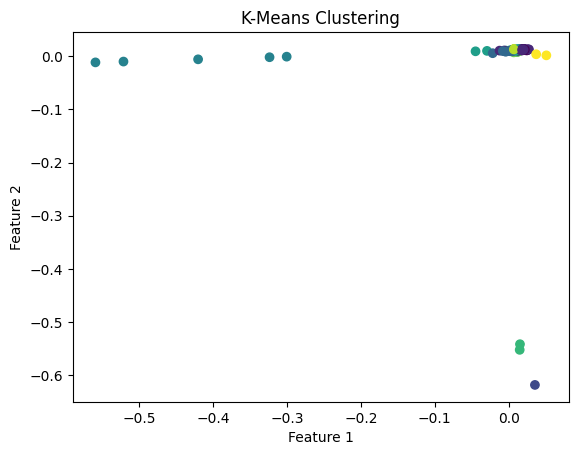


Applying K-Medoids clustering after PCA...
K-Medoids Silhouette Score: 0.12189572031459586


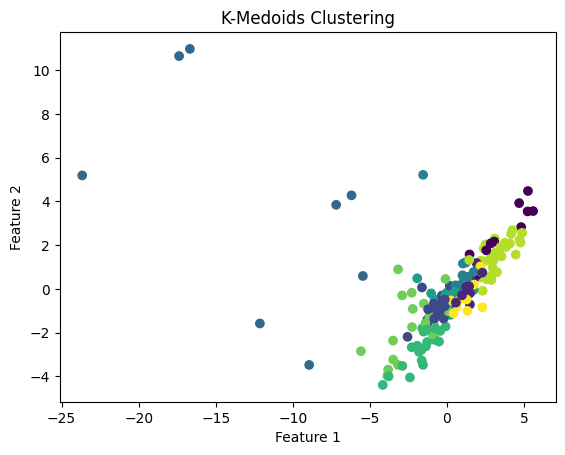


Applying K-Medoids clustering after Isomap...
K-Medoids Silhouette Score: 0.09492304876189621


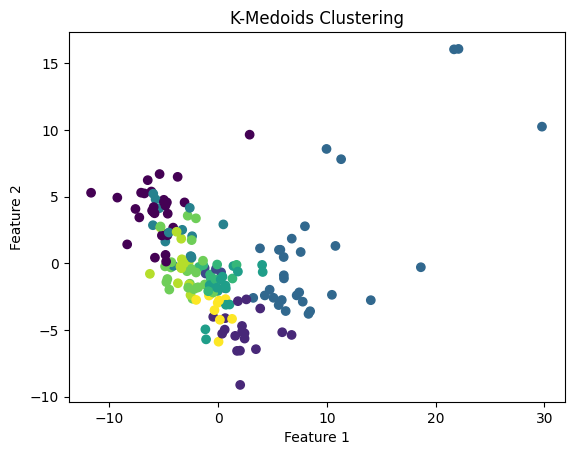


Applying K-Medoids clustering after KernelPCA...
K-Medoids Silhouette Score: 0.1659631040412953


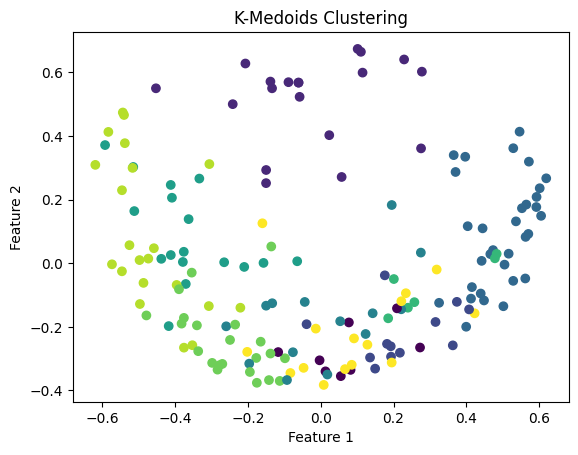


Applying K-Medoids clustering after LocallyLinearEmbedding...
K-Medoids Silhouette Score: 0.11330163952227255


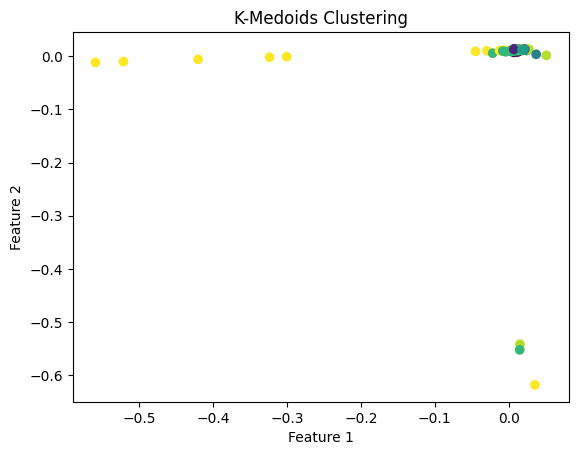


Applying DBSCAN clustering after PCA...
DBSCAN could not compute silhouette score.


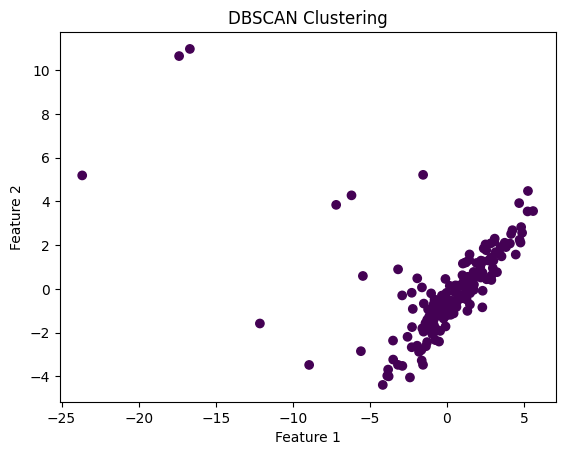


Applying DBSCAN clustering after Isomap...
DBSCAN could not compute silhouette score.


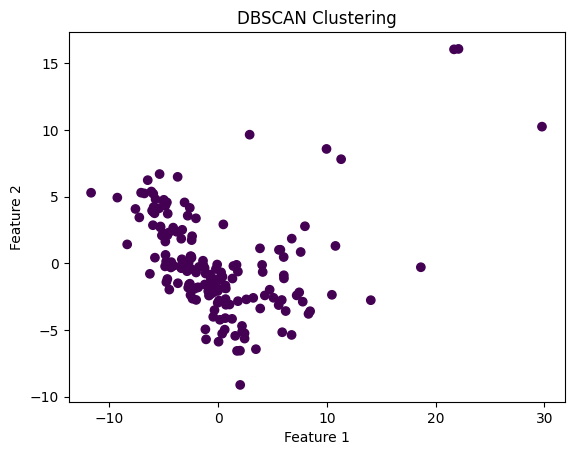


Applying DBSCAN clustering after KernelPCA...
DBSCAN could not compute silhouette score.


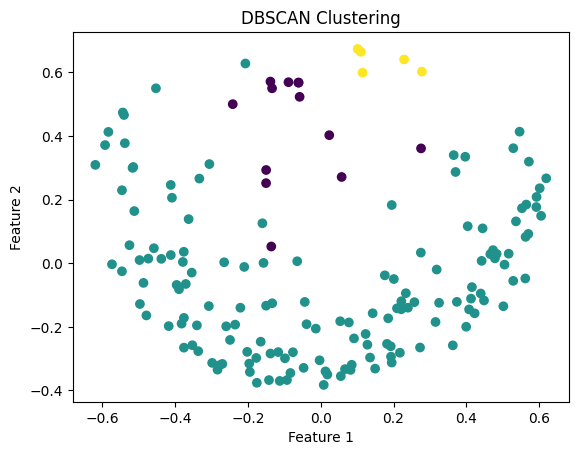


Applying DBSCAN clustering after LocallyLinearEmbedding...
DBSCAN could not compute silhouette score.


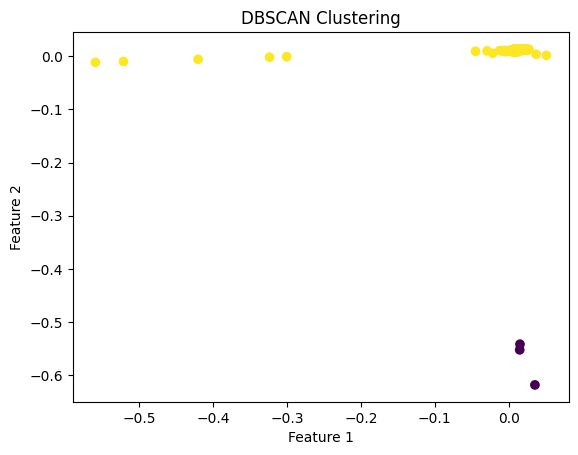

In [30]:
clustering_methods = ["K-Means", "K-Medoids", "DBSCAN"]
for name in clustering_methods:
    for method in dim_reduction_methods.values():
        print(f"\nApplying {name} clustering after {method.__class__.__name__}...")
        X_train_reduced = method.fit_transform(X_train_scaled)
        evaluate_clustering(X_train_reduced, name)